In [1]:
import pandas as pd
import numpy as np
import os as os
import aux.acessos as ac
import aux.aed as aed
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
query_12 = f"""

with amostra_dezembro as (
select cpf_customer
	, cast(c.dt_chat as date) as dt_chat
	, max(novas_tags.hierarquia_4) as hierarquia_4
	, max(n3) as n3
 	FROM cx_curated_zone.cx_contact_rate c
 	left join cx_curated_zone.helpshift_tag_niveis AS helpshift_tag 
    on c.id_issue = helpshift_tag.id_issue
    left join processed_zone_api_cxm_tags.tags_hierarquia_gerencial as novas_tags 
    on trim(lower(n3)) = trim(lower(nm_tag_n3))
 	where dt_chat >= to_date('2022-12-01','yyyy-mm-dd')
	and dt_chat < to_date('2023-01-01','yyyy-mm-dd')
	and (novas_tags.hierarquia_4 like '%%Alteração de endereço%%'
  or novas_tags.hierarquia_4 like '%%Atraso de entrega%%'
  or novas_tags.hierarquia_4 like '%%Custódia%%'
  or novas_tags.hierarquia_4 like '%%Devolução%%'
  or novas_tags.hierarquia_4 like '%%Problema no recebimento do cartão%%'
  or novas_tags.hierarquia_4 like '%%Segunda via cartão%%'
  or novas_tags.hierarquia_4 like '%%Rastreio de cartão%%'
  or novas_tags.hierarquia_4 like '%%Primeiro Desbloqueio de cartão%%')
group by 1, 2
)
select cpf, dt_event, hierarquia_4
, ARRAY_JOIN(ARRAY_AGG(ds_event_name), ' | ') as seq_eventos
, max(n3) as n3
from customer_curated_zone.ca_analitico_frontend f
inner join amostra_dezembro a on (a.cpf_customer = f.cpf 
                            and cast(f.dt_event as date) < a.dt_chat 
                            and cast(f.dt_event as date) >= date_add('day', -15, a.dt_chat)
                            )
group by 1,2,3
    order by rand()
limit 1000

"""

In [5]:
df_12 = ac.df_athena('flavia-costa', query_12)

In [6]:
len(df_12)

1000

In [7]:
query_01 = f"""

with amostra_janeiro as (
select cpf_customer
	, cast(c.dt_chat as date) as dt_chat
	, max(novas_tags.hierarquia_4) as hierarquia_4
	, max(n3) as n3
 	FROM cx_curated_zone.cx_contact_rate c
 	left join cx_curated_zone.helpshift_tag_niveis AS helpshift_tag 
    on c.id_issue = helpshift_tag.id_issue
    left join processed_zone_api_cxm_tags.tags_hierarquia_gerencial as novas_tags 
    on trim(lower(n3)) = trim(lower(nm_tag_n3))
 	where dt_chat >= to_date('2023-01-01','yyyy-mm-dd')
	and dt_chat < to_date('2023-02-01','yyyy-mm-dd')
	and (novas_tags.hierarquia_4 like '%%Alteração de endereço%%'
  or novas_tags.hierarquia_4 like '%%Atraso de entrega%%'
  or novas_tags.hierarquia_4 like '%%Custódia%%'
  or novas_tags.hierarquia_4 like '%%Devolução%%'
  or novas_tags.hierarquia_4 like '%%Problema no recebimento do cartão%%'
  or novas_tags.hierarquia_4 like '%%Segunda via cartão%%'
  or novas_tags.hierarquia_4 like '%%Rastreio de cartão%%'
  or novas_tags.hierarquia_4 like '%%Primeiro Desbloqueio de cartão%%')
group by 1, 2
)
select cpf, dt_event, hierarquia_4
, ARRAY_JOIN(ARRAY_AGG(ds_event_name), ' | ') as seq_eventos
, max(n3) as n3
from customer_curated_zone.ca_analitico_frontend f
inner join amostra_janeiro a on (a.cpf_customer = f.cpf 
                            and cast(f.dt_event as date) < a.dt_chat 
                            and cast(f.dt_event as date) >= date_add('day', -15, a.dt_chat)
                            )
group by 1,2,3
    order by rand()
limit 1000

"""

In [8]:
df_01 = ac.df_athena('flavia-costa', query_01)
len(df_01)

1000

In [9]:
query_02 = f"""

with amostra_fev as (
select cpf_customer
	, cast(c.dt_chat as date) as dt_chat
	, max(novas_tags.hierarquia_4) as hierarquia_4
	, max(n3) as n3
 	FROM cx_curated_zone.cx_contact_rate c
 	left join cx_curated_zone.helpshift_tag_niveis AS helpshift_tag 
    on c.id_issue = helpshift_tag.id_issue
    left join processed_zone_api_cxm_tags.tags_hierarquia_gerencial as novas_tags 
    on trim(lower(n3)) = trim(lower(nm_tag_n3))
 	where dt_chat >= to_date('2023-02-01','yyyy-mm-dd')
	and dt_chat < to_date('2023-03-01','yyyy-mm-dd')
	and (novas_tags.hierarquia_4 like '%%Alteração de endereço%%'
  or novas_tags.hierarquia_4 like '%%Atraso de entrega%%'
  or novas_tags.hierarquia_4 like '%%Custódia%%'
  or novas_tags.hierarquia_4 like '%%Devolução%%'
  or novas_tags.hierarquia_4 like '%%Problema no recebimento do cartão%%'
  or novas_tags.hierarquia_4 like '%%Segunda via cartão%%'
  or novas_tags.hierarquia_4 like '%%Rastreio de cartão%%'
  or novas_tags.hierarquia_4 like '%%Primeiro Desbloqueio de cartão%%')
group by 1, 2
)
select cpf, dt_event, hierarquia_4
, ARRAY_JOIN(ARRAY_AGG(ds_event_name), ' | ') as seq_eventos
, max(n3) as n3
from customer_curated_zone.ca_analitico_frontend f
inner join amostra_fev a on (a.cpf_customer = f.cpf 
                            and cast(f.dt_event as date) < a.dt_chat 
                            and cast(f.dt_event as date) >= date_add('day', -15, a.dt_chat)
                            )
group by 1,2,3
    order by rand()
limit 1000

"""

In [10]:
df_02 = ac.df_athena('flavia-costa', query_02)
len(df_02)

1000

In [11]:
query_03 = f"""

with amostra_mar as (
select cpf_customer
	, cast(c.dt_chat as date) as dt_chat
	, max(novas_tags.hierarquia_4) as hierarquia_4
	, max(n3) as n3
 	FROM cx_curated_zone.cx_contact_rate c
 	left join cx_curated_zone.helpshift_tag_niveis AS helpshift_tag 
    on c.id_issue = helpshift_tag.id_issue
    left join processed_zone_api_cxm_tags.tags_hierarquia_gerencial as novas_tags 
    on trim(lower(n3)) = trim(lower(nm_tag_n3))
 	where dt_chat >= to_date('2023-03-01','yyyy-mm-dd')
	and dt_chat < to_date('2023-04-01','yyyy-mm-dd')
	and (novas_tags.hierarquia_4 like '%%Alteração de endereço%%'
  or novas_tags.hierarquia_4 like '%%Atraso de entrega%%'
  or novas_tags.hierarquia_4 like '%%Custódia%%'
  or novas_tags.hierarquia_4 like '%%Devolução%%'
  or novas_tags.hierarquia_4 like '%%Problema no recebimento do cartão%%'
  or novas_tags.hierarquia_4 like '%%Segunda via cartão%%'
  or novas_tags.hierarquia_4 like '%%Rastreio de cartão%%'
  or novas_tags.hierarquia_4 like '%%Primeiro Desbloqueio de cartão%%')
group by 1, 2
)
select cpf, dt_event, hierarquia_4
, ARRAY_JOIN(ARRAY_AGG(ds_event_name), ' | ') as seq_eventos
, max(n3) as n3
from customer_curated_zone.ca_analitico_frontend f
inner join amostra_mar a on (a.cpf_customer = f.cpf 
                            and cast(f.dt_event as date) < a.dt_chat 
                            and cast(f.dt_event as date) >= date_add('day', -15, a.dt_chat)
                            )
group by 1,2,3
    order by rand()
limit 1000

"""
df_03 = ac.df_athena('flavia-costa', query_03)
len(df_03)

1000

In [12]:
query_04 = f"""

with amostra_abr as (
select cpf_customer
	, cast(c.dt_chat as date) as dt_chat
	, max(novas_tags.hierarquia_4) as hierarquia_4
	, max(n3) as n3
 	FROM cx_curated_zone.cx_contact_rate c
 	left join cx_curated_zone.helpshift_tag_niveis AS helpshift_tag 
    on c.id_issue = helpshift_tag.id_issue
    left join processed_zone_api_cxm_tags.tags_hierarquia_gerencial as novas_tags 
    on trim(lower(n3)) = trim(lower(nm_tag_n3))
 	where dt_chat >= to_date('2023-04-01','yyyy-mm-dd')
	and dt_chat < to_date('2023-05-01','yyyy-mm-dd')
	and (novas_tags.hierarquia_4 like '%%Alteração de endereço%%'
  or novas_tags.hierarquia_4 like '%%Atraso de entrega%%'
  or novas_tags.hierarquia_4 like '%%Custódia%%'
  or novas_tags.hierarquia_4 like '%%Devolução%%'
  or novas_tags.hierarquia_4 like '%%Problema no recebimento do cartão%%'
  or novas_tags.hierarquia_4 like '%%Segunda via cartão%%'
  or novas_tags.hierarquia_4 like '%%Rastreio de cartão%%'
  or novas_tags.hierarquia_4 like '%%Primeiro Desbloqueio de cartão%%')
group by 1, 2
)
select cpf, dt_event, hierarquia_4
, ARRAY_JOIN(ARRAY_AGG(ds_event_name), ' | ') as seq_eventos
, max(n3) as n3
from customer_curated_zone.ca_analitico_frontend f
inner join amostra_abr a on (a.cpf_customer = f.cpf 
                            and cast(f.dt_event as date) < a.dt_chat 
                            and cast(f.dt_event as date) >= date_add('day', -15, a.dt_chat)
                            )
group by 1,2,3
    order by rand()
limit 1000

"""
df_04 = ac.df_athena('flavia-costa', query_04)
len(df_04)

1000

In [13]:
query_05 = f"""

with amostra_mai as (
select cpf_customer
	, cast(c.dt_chat as date) as dt_chat
	, max(novas_tags.hierarquia_4) as hierarquia_4
	, max(n3) as n3
 	FROM cx_curated_zone.cx_contact_rate c
 	left join cx_curated_zone.helpshift_tag_niveis AS helpshift_tag 
    on c.id_issue = helpshift_tag.id_issue
    left join processed_zone_api_cxm_tags.tags_hierarquia_gerencial as novas_tags 
    on trim(lower(n3)) = trim(lower(nm_tag_n3))
 	where dt_chat >= to_date('2023-05-01','yyyy-mm-dd')
	and dt_chat < to_date('2023-06-01','yyyy-mm-dd')
	and (novas_tags.hierarquia_4 like '%%Alteração de endereço%%'
  or novas_tags.hierarquia_4 like '%%Atraso de entrega%%'
  or novas_tags.hierarquia_4 like '%%Custódia%%'
  or novas_tags.hierarquia_4 like '%%Devolução%%'
  or novas_tags.hierarquia_4 like '%%Problema no recebimento do cartão%%'
  or novas_tags.hierarquia_4 like '%%Segunda via cartão%%'
  or novas_tags.hierarquia_4 like '%%Rastreio de cartão%%'
  or novas_tags.hierarquia_4 like '%%Primeiro Desbloqueio de cartão%%')
group by 1, 2
)
select cpf, dt_event, hierarquia_4
, ARRAY_JOIN(ARRAY_AGG(ds_event_name), ' | ') as seq_eventos
, max(n3) as n3
from customer_curated_zone.ca_analitico_frontend f
inner join amostra_mai a on (a.cpf_customer = f.cpf 
                            and cast(f.dt_event as date) < a.dt_chat 
                            and cast(f.dt_event as date) >= date_add('day', -15, a.dt_chat)
                            )
group by 1,2,3
    order by rand()
limit 1000

"""
df_05 = ac.df_athena('flavia-costa', query_05)
len(df_05)

1000

In [14]:
df_12['periodo'] = '1 - antes problema'
df_01['periodo'] = '1 - antes problema'
df_02['periodo'] = '1 - antes problema'

df_03['periodo'] = '2 - depois problema'
df_04['periodo'] = '2 - depois problema'
df_05['periodo'] = '2 - depois problema'

In [15]:
df = df_12.append(df_01).append(df_02).append(df_03).append(df_04).append(df_05)

/tmp/ipykernel_276209/777699086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_12.append(df_01).append(df_02).append(df_03).append(df_04).append(df_05)
/tmp/ipykernel_276209/777699086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_12.append(df_01).append(df_02).append(df_03).append(df_04).append(df_05)
/tmp/ipykernel_276209/777699086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_12.append(df_01).append(df_02).append(df_03).append(df_04).append(df_05)
/tmp/ipykernel_276209/777699086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_12.append(df_01).append(df_02).append(df_03).append(df_04

In [16]:
len(df)

6000

In [17]:
df.head()

,cpf,dt_event,hierarquia_4,seq_eventos,n3,periodo
0,83483799915,2022-12-18,Problema no recebimento do cartão,start | login_knownuser | onboarding_event | i...,w3 - reenvio do cartao primeira entrega,1 - antes problema
1,17370811727,2022-12-12,Problema no recebimento do cartão,click_button_next_tourhomeprofile | insert_tex...,b3 - reenvio do cartao pedido de 2 via,1 - antes problema
2,06266551535,2022-11-28,Segunda via cartão,home | click_button_password_loginknownuser | ...,w3 - 2 via cartao perdido,1 - antes problema
3,05757573295,2022-12-23,Problema no recebimento do cartão,entered_the_app_ill_store | click_button_back_...,w3 - cartão entregue para outra pessoa,1 - antes problema
4,70493267476,2022-12-14,Problema no recebimento do cartão,login_knownuser | home | insert_textfield_pin_...,b3 - reenvio do cartao pedido de 2 via,1 - antes problema


In [24]:
df['seq_eventos'].value_counts(normalize = True)[:30]

will_receive_push_infobip                                                                                   0.041167
will_receive_push_salesforce                                                                                0.017000
login_knownuser | insert_textfield_password_loginknownuser                                                  0.006333
will_receive_push_infobip | will_receive_push_infobip                                                       0.005500
login_knownuser | insert_textfield_password_loginknownuser | home                                           0.004333
insert_textfield_password_loginknownuser | login_knownuser                                                  0.003833
home | login_knownuser | insert_textfield_password_loginknownuser                                           0.003333
login_password                                                                                              0.003000
login_password | home                                           

In [36]:
df.query('seq_eventos.str.contains("card")', engine='python')['seq_eventos'].value_counts(normalize = True)[:10]

login_knownuser | insert_textfield_password_loginknownuser | home | click_box_tracking_card_home                                                                                                       0.001758
insert_textfield_password_loginknownuser | home | click_box_tracking_card_home | login_knownuser                                                                                                       0.001005
click_box_mycards_home | login_knownuser | insert_textfield_password_loginknownuser | home                                                                                                             0.000754
home | login_knownuser | click_box_tracking_card_home | insert_textfield_password_loginknownuser                                                                                                       0.000754
insert_textfield_password_loginknownuser | click_button_password_loginknownuser | home | click_box_tracking_card_home | login_knownuser                                 

In [28]:
from sksequitur import parse

In [31]:
df['seq_sequitur'] = df['seq_eventos'].apply(lambda x: parse(x))

In [32]:
df.head()

,cpf,dt_event,hierarquia_4,seq_eventos,n3,periodo,seq_sequitur
0,83483799915,2022-12-18,Problema no recebimento do cartão,start | login_knownuser | onboarding_event | i...,w3 - reenvio do cartao primeira entrega,1 - antes problema,"{0: ['s', 't', 1, 2, 3, '_', 4, 5, 'b', 'o', 1..."
1,17370811727,2022-12-12,Problema no recebimento do cartão,click_button_next_tourhomeprofile | insert_tex...,b3 - reenvio do cartao pedido de 2 via,1 - antes problema,"{0: [1, 2, 3, 4, 5, 'o', 'r', 6, 7, 8, 9, 10, ..."
2,06266551535,2022-11-28,Segunda via cartão,home | click_button_password_loginknownuser | ...,w3 - 2 via cartao perdido,1 - antes problema,"{0: ['h', 'o', 'm', 'e', 1, 2, 3, 4, 5, 't', '..."
3,05757573295,2022-12-23,Problema no recebimento do cartão,entered_the_app_ill_store | click_button_back_...,w3 - cartão entregue para outra pessoa,1 - antes problema,"{0: ['e', 1, 'e', 2, 3, 'h', 4, 'a', 'p', 'p',..."
4,70493267476,2022-12-14,Problema no recebimento do cartão,login_knownuser | home | insert_textfield_pin_...,b3 - reenvio do cartao pedido de 2 via,1 - antes problema,"{0: [1, 2, 3, 4, 5, 2, 'v', 6, 7, 5, 8, 'b', '..."


In [34]:
df['seq_sequitur'].value_counts()

{0: ['w', 'i', 'l', 'l', '_', 'r', 'e', 'c', 'e', 'i', 'v', 'e', '_', 'p', 'u', 's', 'h', '_', 'i', 'n', 'f', 'o', 'b', 'i', 'p']}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [39]:
df.query('seq_eventos.str.contains("card")', engine='python')[['seq_eventos', 'hierarquia_4', 'cpf']]\
.groupby(['seq_eventos', 'hierarquia_4']).count().to_csv('eventos_cartao_hierarquia4.csv')

In [40]:
df.query('seq_eventos.str.contains("card")', engine='python')[['seq_eventos', 'n3', 'cpf']]\
.groupby(['seq_eventos', 'n3']).count().to_csv('eventos_cartao_n3.csv')

In [41]:
df.query('seq_eventos.str.contains("card")', engine='python')[['seq_eventos', 'hierarquia_4','periodo' , 'cpf']]\
.groupby(['seq_eventos', 'hierarquia_4', 'periodo']).count().to_csv('eventos_cartao_hierarquia4_b.csv')

In [42]:
from arabica import arabica_freq

In [43]:
df['seq_eventos'] = df.seq_eventos.str.replace('|', ' ')

/tmp/ipykernel_276209/2950480062.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [44]:
df.head()

,cpf,dt_event,hierarquia_4,seq_eventos,n3,periodo,seq_sequitur
0,83483799915,2022-12-18,Problema no recebimento do cartão,start login_knownuser onboarding_event i...,w3 - reenvio do cartao primeira entrega,1 - antes problema,"{0: ['s', 't', 1, 2, 3, '_', 4, 5, 'b', 'o', 1..."
1,17370811727,2022-12-12,Problema no recebimento do cartão,click_button_next_tourhomeprofile insert_tex...,b3 - reenvio do cartao pedido de 2 via,1 - antes problema,"{0: [1, 2, 3, 4, 5, 'o', 'r', 6, 7, 8, 9, 10, ..."
2,06266551535,2022-11-28,Segunda via cartão,home click_button_password_loginknownuser ...,w3 - 2 via cartao perdido,1 - antes problema,"{0: ['h', 'o', 'm', 'e', 1, 2, 3, 4, 5, 't', '..."
3,05757573295,2022-12-23,Problema no recebimento do cartão,entered_the_app_ill_store click_button_back_...,w3 - cartão entregue para outra pessoa,1 - antes problema,"{0: ['e', 1, 'e', 2, 3, 'h', 4, 'a', 'p', 'p',..."
4,70493267476,2022-12-14,Problema no recebimento do cartão,login_knownuser home insert_textfield_pin_...,b3 - reenvio do cartao pedido de 2 via,1 - antes problema,"{0: [1, 2, 3, 4, 5, 2, 'v', 6, 7, 5, 8, 'b', '..."


In [69]:
eventos_retirar = ['login_knownuser', 'home', 'insert_textfield_password_loginknownuser', 'click_button_password_loginknownuser']

In [49]:
import re

In [91]:

def retira_eventos(text):
       
   pattern = r'\b(' + '|'.join(eventos_retirar) + r')\b'
   text = re.sub(pattern, '', str(text))
   text = text.replace('  ',' ')
   return text

df['seq_eventos_clean'] = df['seq_eventos'].apply(retira_eventos)


In [92]:
from unidecode import unidecode

def clean_text(x):
    x = x.strip()
    x = x.lower()
    x = unidecode(x)
    x = re.sub(r'\t', ' ', x)
    x = re.sub(r'http\S+', '', x)  # remove url
    x = re.sub(r'(nbsp\;|[rl]dquo\;|quot\;|acute\;|tilde\;|circ\;|grave\;|cedil\;|\&|\/)', '', x)  # replace special characters
    x = x.replace('&ccedil;','ç')
    x = x.replace('&atilde;;','ã')
    x = x.replace('&otilde;;','õ')
    #x = re.sub(r'(\d{1,}|\!|\?|\,|\.|\\n|\:|\;|\`|\´|\-|\_)', ' ', x)  # replace punctuation and remove numbers
    x = x.replace('  ',' ')
    x = x.replace('\n','')
    x = x.strip()
    return x

In [93]:
df['seq_eventos_clean'] = df['seq_eventos_clean'].apply(clean_text)

df['seq_eventos_clean'] = df['seq_eventos_clean'].str.replace('  ', ' ')

#retira tokens consecutivos
df['seq_eventos_clean'] = df['seq_eventos_clean'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')


df_clean = df.query('seq_eventos_clean != ""').query('seq_eventos_clean != " "').query('seq_eventos_clean != "  "')

/tmp/ipykernel_276209/4075824640.py:6: FutureWarning: The default value of regex will change from True to False in a future version.


In [94]:
df_agg_ungroup_tmp = arabica_freq(
                text = df_clean['seq_eventos_clean'],
                time = df_clean['dt_event'],
                time_freq = 'ungroup',           # opção ungroup
                max_words = 30,             
                stopwords = ['portuguese'],   
                skip = [eventos_retirar],         
                numbers = True,            
                punct = True,              
                lower_case = True)

df_agg_ungroup_tmp.head(40)

/home/flavia.costa/.local/lib/python3.8/site-packages/arabica/arabica_freq.py:61: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
/home/flavia.costa/.local/lib/python3.8/site-packages/arabica/arabica_freq.py:103: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/home/flavia.costa/.local/lib/python3.8/site-packages/arabica/arabica_freq.py:104: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/home/flavia.costa/.local/lib/python3.8/site-packages/arabica/arabica_freq.py:113: FutureWarning: The default value of regex will change from True

,unigram,unigram_freq,bigram,bigram_freq,trigram,trigram_freq
0,clickboxtrackingcardhome,1965,"openmodalmgminapp,clickbuttonclose",225,"closure,mgmsource,stringpixtransfer",84
1,clickboxmycardshome,1574,"clickiconviewmycardsvirtual,inserttextfieldpin...",166,"start,clickimg,start",46
2,start,1413,"clickimg,start",157,"clickiconviewmycardsvirtual,inserttextfieldpin...",38
3,clickboxcorecredithome,1394,"inserttextfieldpinviewcardvirtual,clickbuttonn...",153,"clicou,botao,voltar",38
4,clickboxcreditlimithome,1334,"loginpassword,inserttextfieldpasswordloginpass...",143,"usuario,clicou,botao",38
5,onboardingevent,1206,"start,onboardingevent",131,"clickbuttonclientstart,onboardingevent,insertt...",31
6,loginpassword,1133,"onboardingevent,inserttextfieldcpfcpf",129,"clickboxtrackingcardhome,clickcardtrackinginre...",31
7,openmodalmgminapp,1063,"clickbuttonclientstart,onboardingevent",114,"start,clickbuttonclientstart,onboardingevent",31
8,clickcardvirtualcardlist,1011,"clickcardvirtualcardlist,clickiconviewmycardsv...",113,"onboardingevent,inserttextfieldcpfcpf,clickbut...",30
9,clickbuttonprofilehome,962,"start,clickbuttonclientstart",111,"openmodalmgminapp,clickbuttonclose,clickboxtra...",28


In [95]:
df['periodo'].unique()

array(['1 - antes problema', '2 - depois problema'], dtype=object)

In [96]:
df_clean_antes = df_clean.query('periodo == "1 - antes problema"')
df_clean_depois = df_clean.query('periodo == "2 - depois problema"')

In [97]:
df_agg_ungroup_at = arabica_freq(
                text = df_clean_antes['seq_eventos_clean'],
                time = df_clean_antes['dt_event'],
                time_freq = 'ungroup',           # opção ungroup
                max_words = 30,             
                stopwords = ['portuguese'],   
                skip = [eventos_retirar],         
                numbers = True,            
                punct = True,              
                lower_case = True)

df_agg_ungroup_at.head(40)

/home/flavia.costa/.local/lib/python3.8/site-packages/arabica/arabica_freq.py:103: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/home/flavia.costa/.local/lib/python3.8/site-packages/arabica/arabica_freq.py:104: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/home/flavia.costa/.local/lib/python3.8/site-packages/arabica/arabica_freq.py:113: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/home/flavia.costa/.local/lib/python3.8/site-packages/arabica/arabica_freq.py:114: FutureWarning: The default value of regex will change from Tru

,unigram,unigram_freq,bigram,bigram_freq,trigram,trigram_freq
0,clickboxmycardshome,975,"openmodalmgminapp,clickbuttonclose",101,"clicou,botao,voltar",38
1,start,772,"clickimg,start",92,"usuario,clicou,botao",38
2,clickboxcorecredithome,763,"clickiconviewmycardsvirtual,inserttextfieldpin...",91,"start,clickimg,start",21
3,clickboxcreditlimithome,692,"onboardingevent,inserttextfieldcpfcpf",80,"clickiconviewmycardsvirtual,inserttextfieldpin...",20
4,clickboxtrackingcardhome,647,"start,onboardingevent",79,"onboardingevent,inserttextfieldcpfcpf,clickbut...",18
5,onboardingevent,644,"loginpassword,inserttextfieldpasswordloginpass...",79,"clickbuttonclientstart,onboardingevent,insertt...",16
6,loginpassword,628,"inserttextfieldpinviewcardvirtual,clickbuttonn...",78,"start,clickbuttonclientstart,onboardingevent",15
7,openmodalmgminapp,491,"clickboxcreditlimithome,clickbuttonajustlimitc...",63,"start,onboardingevent,inserttextfieldcpfcpf",15
8,clickcardvirtualcardlist,483,"clickbuttonclientstart,onboardingevent",59,"clickboxtrackingcardhome,clickcardtrackinginre...",15
9,clickboxcoreaccounthome,481,"clickboxcorecredithome,clickbuttonopeninvoicec...",57,"inserttextfieldcpfcpf,clickbuttonnextcpf,login...",14


In [98]:
df_agg_ungroup_at['unigram_freq'] = df_agg_ungroup_at['unigram_freq'].astype('int')
df_agg_ungroup_at['bigram_freq'] = df_agg_ungroup_at['bigram_freq'].astype('int')
df_agg_ungroup_at['trigram_freq'] = df_agg_ungroup_at['trigram_freq'].astype('int')

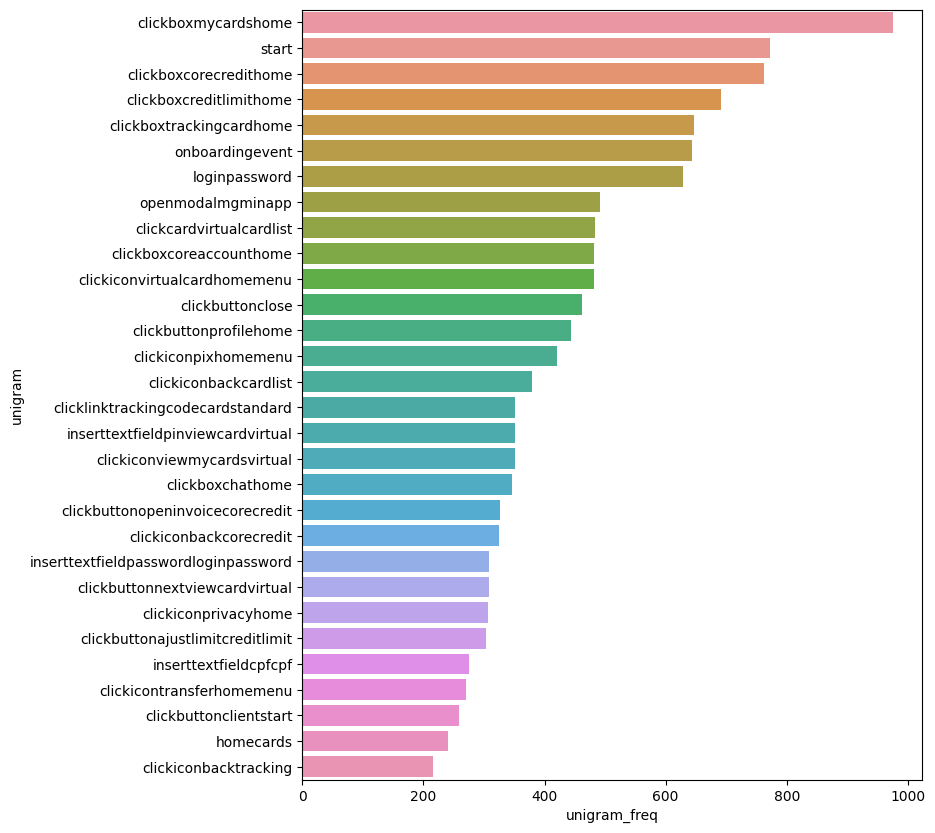

In [104]:
plt.figure(figsize=(8,10))
sns.barplot(data = df_agg_ungroup_at.sort_values(by ='unigram_freq', ascending=False), x = 'unigram_freq', y = 'unigram')
plt.show()

In [100]:
df_agg_ungroup_dp = arabica_freq(
                text = df_clean_depois['seq_eventos_clean'],
                time = df_clean_depois['dt_event'],
                time_freq = 'ungroup',           # opção ungroup
                max_words = 30,             
                stopwords = ['portuguese'],   
                skip = [eventos_retirar],         
                numbers = True,            
                punct = True,              
                lower_case = True)

df_agg_ungroup_dp.head(40)

/home/flavia.costa/.local/lib/python3.8/site-packages/arabica/arabica_freq.py:61: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
/home/flavia.costa/.local/lib/python3.8/site-packages/arabica/arabica_freq.py:103: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/home/flavia.costa/.local/lib/python3.8/site-packages/arabica/arabica_freq.py:104: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/home/flavia.costa/.local/lib/python3.8/site-packages/arabica/arabica_freq.py:113: FutureWarning: The default value of regex will change from True

,unigram,unigram_freq,bigram,bigram_freq,trigram,trigram_freq
0,clickboxtrackingcardhome,1318,"openmodalmgminapp,clickbuttonclose",124,"closure,mgmsource,stringpixtransfer",84
1,clickboxcreditlimithome,642,"closure,mgmsource",107,"start,clickimg,start",25
2,start,641,"mgmsource,stringpixtransfer",84,"closure,mgmsource,stringrecharge",23
3,clickboxcorecredithome,631,"clickiconviewmycardsvirtual,inserttextfieldpin...",75,"clickiconviewmycardsvirtual,inserttextfieldpin...",18
4,clickboxmycardshome,599,"inserttextfieldpinviewcardvirtual,clickbuttonn...",75,"openmodalmgminapp,clickbuttonclose,clickboxtra...",18
5,willreceivepushinfobip,596,"clickboxtrackingcardhome,clickcardtrackinginre...",72,"clickboxtrackingcardhome,clickcardtrackinginre...",16
6,openmodalmgminapp,572,"clickimg,start",65,"stringpixtransfer,closure,mgmsource",16
7,onboardingevent,562,"openmodalmgminapp,clickboxtrackingcardhome",65,"mgmsource,stringpixtransfer,closure",16
8,clickcardvirtualcardlist,528,"clickiconbacktracking,clickiconbackcardlist",64,"start,clickbuttonclientstart,onboardingevent",16
9,clickbuttonprofilehome,519,"loginpassword,inserttextfieldpasswordloginpass...",64,"clickbuttonclientstart,onboardingevent,insertt...",15


In [101]:
df_agg_ungroup_dp['unigram_freq'] = df_agg_ungroup_dp['unigram_freq'].astype('int')
df_agg_ungroup_dp['bigram_freq'] = df_agg_ungroup_dp['bigram_freq'].astype('int')
df_agg_ungroup_dp['trigram_freq'] = df_agg_ungroup_dp['trigram_freq'].astype('int')

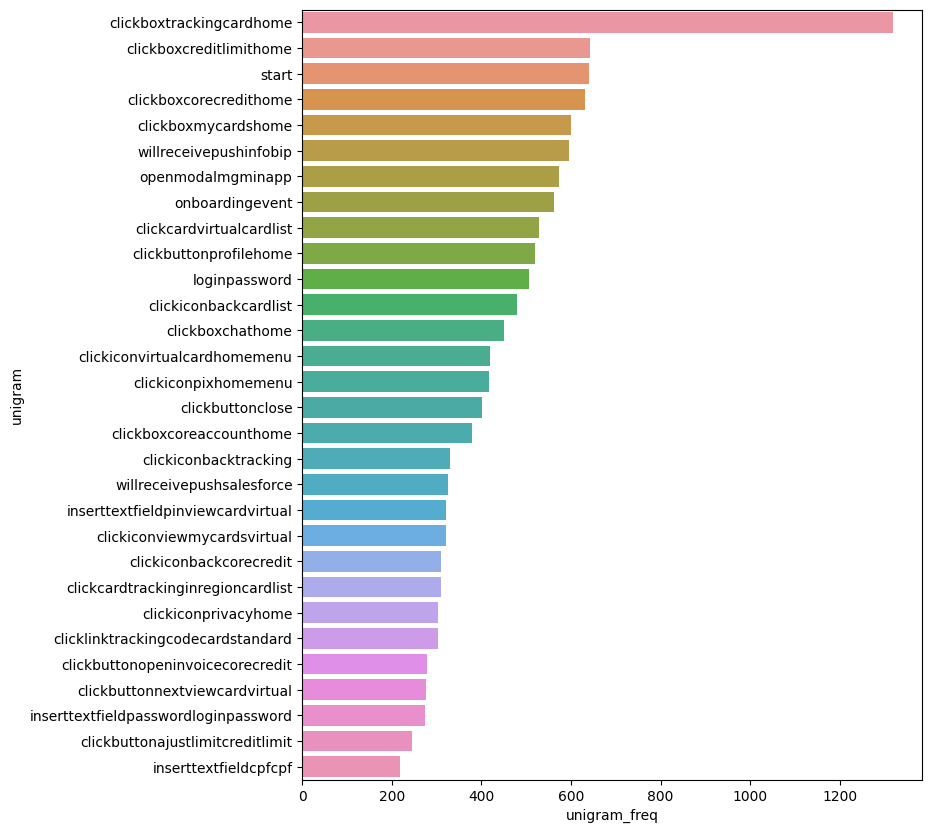

In [106]:
plt.figure(figsize=(8,10))
sns.barplot(data = df_agg_ungroup_dp.sort_values(by ='unigram_freq', ascending=False), x = 'unigram_freq', y = 'unigram')
plt.show()